# Solve the wave equation

In [1]:
# Define two grid functions `t`, `x` holding the coordinates
function coords(nn, ni, dt, dx)
    t = [n * dt for i in 0:ni, n in 0:nn]
    x = [i * dx for i in 0:ni, n in 0:nn]
    return t, x
end

coords (generic function with 1 method)

In [2]:
nn = 100
ni = 100
dt = 1 / nn
dx = 1 / ni
t, x = coords(nn, ni, dt, dx);

In [3]:
# Define initial conditions for a standing wave
function standing(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = cos(2π * t[i, n]) * sin(2π * x[i, n])
    end
    return u
end

standing (generic function with 1 method)

In [4]:
u = standing(t, x);

In [5]:
using CairoMakie

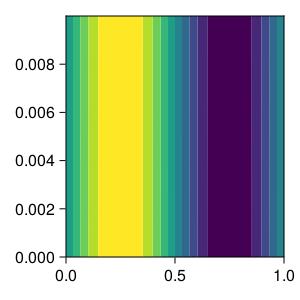

In [6]:
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x[:,1:2]), vec(t[:,1:2]), vec(u[:,1:2]))
fig

In [7]:
# Find the solution at one interior point `u[i,n]`
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / dx^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * dt^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [8]:
# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [9]:
# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

In [10]:
evolve!(u, dt, dx)

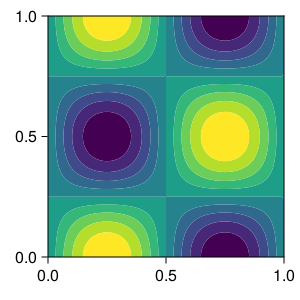

In [11]:
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
fig

In [12]:
t1, x1 = coords(2nn, 2ni, dt/2, dx/2);

In [13]:
u1 = standing(t1, x1);

In [14]:
evolve!(u1, dt/2, dx/2)

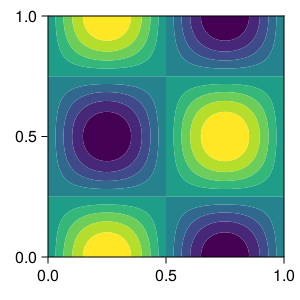

In [15]:
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1,1])
contourf!(fig[1,1], vec(x1), vec(t1), vec(u1))
fig

In [16]:
# Calculate error
function calculate_error(t, x, u)
    ni, nn = size(u)
    err = similar(u)
    for n in 1:nn, i in 1:ni
        err[i,n] = u[i,n] - cos(2π * t[i, n]) * sin(2π * x[i, n])
    end
    return err
end

calculate_error (generic function with 1 method)

In [17]:
err = calculate_error(t, x, u)
maximum(abs.(err))

4.746203430272544e-15

In [18]:
err1 = calculate_error(t1, x1, u1)
maximum(abs.(err1))

4.579669976578771e-15

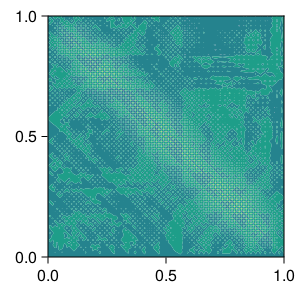

In [19]:
# Show error
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(err))
fig

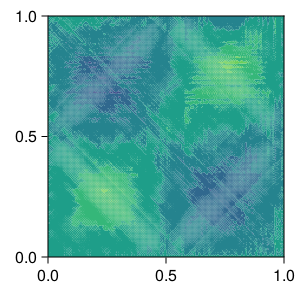

In [20]:
# Show error
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x1), vec(t1), vec(err1))
fig